In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import pandas_profiling
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# Funciones y utilidades

In [2]:
def read_amb_clean_dataset(file_path, sheet_name):
    ground_truth = pd.read_excel(file_path, sheet_name=sheet_name) # read sheet normal
    ground_truth = ground_truth.drop(ground_truth.index[0]) # delete first row.
    ground_truth = ground_truth.replace('NoData', np.nan)
    ground_truth = ground_truth.replace('nan', np.nan)
    ground_truth = ground_truth.replace('<Samp', np.nan)
    ground_truth = ground_truth.replace('---', np.nan)
    ground_truth = ground_truth.replace('InVld', np.nan)
    ground_truth["PM10"] = ground_truth.PM10.astype('float')
    ground_truth["PM2.5"] = ground_truth["PM2.5"].astype('float')
    ground_truth["Temp_Aire"] = ground_truth["Temp_Aire"].astype('float')
    ground_truth["Lluvia"] = ground_truth.Lluvia.astype('float')
    ground_truth["Humedad_relativa"] = ground_truth.Humedad_relativa.astype('float')
    ground_truth["WD"] = ground_truth.WD.astype('float')
    ground_truth["WS"] = ground_truth.WS.astype('float')
    ground_truth["R_Solar"] = ground_truth.R_Solar.astype('float')
    ground_truth["Date&Time"] = pd.to_datetime(ground_truth["Date&Time"], format = '%d/%m/%Y/%H:%M:%S')
    ground_truth = ground_truth.fillna(ground_truth.mean())
    ground_truth.set_index('Date&Time', inplace=True)
    print("La AMB tomó {} registros".format(len(ground_truth)))
    return ground_truth

def read_sensor_clean_dataset(file_path):
    ground_truth = pd.read_csv(file_path) # read sheet normal
    ground_truth = ground_truth.replace('NoData', np.nan)
    ground_truth = ground_truth.replace('nan', np.nan)
    ground_truth = ground_truth.replace('<Samp', np.nan)
    ground_truth = ground_truth.replace('---', np.nan)
    ground_truth = ground_truth.replace('InVld', np.nan)
    ground_truth = ground_truth.fillna(ground_truth.mean())
    ground_truth["df_index"] = ground_truth.index
    ground_truth["fecha_hora_med"] = ground_truth["fecha_hora_med"].replace("T"," ")
    ground_truth["fecha_hora_med"] = pd.to_datetime(ground_truth["fecha_hora_med"])
    ground_truth = ground_truth.drop_duplicates( keep = False)
    ground_truth.set_index('fecha_hora_med', inplace=True)
    return ground_truth

# Lectura y procesamiento de datos

In [24]:
amb_file_path = "datos/Datos Estaciones AMB.xlsx"
amb_sheet_name = "Normal"
amb_data_df =  read_amb_clean_dataset(amb_file_path, amb_sheet_name)
amb_data_df.profile_report()

Summarize dataset:  61%|██████    | 14/23 [00:00<00:00, 96.90it/s, Calculate phi_k correlation]      

La AMB tomó 8040 registros


Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


In [66]:
first_file_path = "datos/mediciones_clg_normalsup_pm25_a_2018-11-01T00_00_00_2018-11-30T23_59_59.csv"
first_df = read_sensor_clean_dataset(first_file_path)
second_file_path = "datos/mediciones_clg_normalsup_pm25_a_2018-12-01T00_00_00_2018-12-31T23_59_59.csv"
second_df = read_sensor_clean_dataset(second_file_path)
third_file_path = "datos/mediciones_clg_normalsup_pm25_a_2019-04-01T00_00_00_2019-04-30T23_59_59.csv"
third_df = read_sensor_clean_dataset(third_file_path)
fourth_file_path = "datos/mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59.csv"
fourth_df = read_sensor_clean_dataset(fourth_file_path)
fifth_file_path = "datos/mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59.csv"
fifth_df = read_sensor_clean_dataset(fifth_file_path)
sixth_file_path = "datos/mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59.csv"
sixth_df = read_sensor_clean_dataset(sixth_file_path)
seventh_file_path = "datos/mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59.csv"
seventh_df = read_sensor_clean_dataset(seventh_file_path)
sensor_df = pd.concat([first_df, second_df, third_df,
                       fourth_df, fifth_df, sixth_df,
                       seventh_df])


print(len(sensor_df))
sensor_df = sensor_df.sort_index()
amb_data_df = amb_data_df.sort_index()
sensor_df.index = sensor_df.index.tz_localize(None)
amb_data_df.index = amb_data_df.index.tz_localize(None)
print("Original sensor data")
display(sensor_df)
sensor_df  = sensor_df.resample('H').mean()

5009
Original sensor data


id_parametro      valor  df_index
fecha_hora_med                                           
2018-11-03 23:32:49.639       pm25_a   9.083333      1334
2018-11-03 23:37:50.639       pm25_a   9.083333      1333
2018-11-03 23:42:50.639       pm25_a   8.583334      1332
2018-11-03 23:47:49.641       pm25_a   8.666667      1331
2018-11-03 23:52:49.638       pm25_a   8.666666      1330
...                              ...        ...       ...
2019-09-01 00:02:50.912       pm25_a   6.166667         4
2019-09-01 01:02:49.911       pm25_a   7.833333         3
2019-09-01 02:02:49.912       pm25_a   5.416667         2
2019-09-01 03:02:49.912       pm25_a   5.750000         1
2019-09-01 04:03:01.820       pm25_a  19.166668         0

[5009 rows x 3 columns]

In [26]:
print("Sensor data rescaled to hours")
sensor_df

Sensor data rescaled to hours


valor  df_index
fecha_hora_med                          
2018-11-03 23:00:00   8.680555    1331.5
2018-11-04 00:00:00   8.472222    1322.5
2018-11-04 01:00:00   6.909722    1310.5
2018-11-04 02:00:00   6.347222    1298.5
2018-11-04 03:00:00   7.833333    1286.5
...                        ...       ...
2019-09-01 00:00:00   6.166667       4.0
2019-09-01 01:00:00   7.833333       3.0
2019-09-01 02:00:00   5.416667       2.0
2019-09-01 03:00:00   5.750000       1.0
2019-09-01 04:00:00  19.166668       0.0

[7230 rows x 2 columns]

In [27]:
print("AMB reference data")
display(amb_data_df)

final_df = pd.merge(sensor_df, amb_data_df, how='inner', left_index=True, right_index=True)
final_df.dropna(axis=0, inplace=True)
final_df = final_df.sort_index()
print("Final Sensor and AMB data")
display(final_df)

AMB reference data


PM10  PM2.5  Temp_Aire  Lluvia  Humedad_relativa  \
Date&Time                                                               
2018-10-01 00:00:00  13.0    6.4       22.9     0.0              80.2   
2018-10-01 01:00:00  13.8    6.4       21.9     0.1              88.0   
2018-10-01 02:00:00  13.2    6.7       22.1     0.0              87.0   
2018-10-01 03:00:00  12.4    6.0       22.1     0.0              83.1   
2018-10-01 04:00:00  16.1    7.3       21.2     0.0              90.8   
...                   ...    ...        ...     ...               ...   
2019-08-31 19:00:00  35.6   20.4       25.0     0.0              75.4   
2019-08-31 20:00:00  30.0   18.7       24.8     0.0              75.2   
2019-08-31 21:00:00  38.1   22.8       24.7     0.0              75.8   
2019-08-31 22:00:00  46.6   25.2       24.3     0.0              78.5   
2019-08-31 23:00:00  33.8   18.0       23.2     0.0              74.9   

                            WD        WS  R_Solar  
Date&Time                                          
2018-10-01 00:00:00  126.20000  1.000000      0.0  
2018-10-01 01:00:00  124.60000  1.100000      0.0  
2018-10-01 02:00:00  134.80000  1.100000      0.0  
2018-10-01 03:00:00  140.60000  0.800000      0.0  
2018-10-01 04:00:00  177.50000  1.000000      0.0  
...                        ...       ...      ...  
2019-08-31 19:00:00  262.03127  1.438257      1.4  
2019-08-31 20:00:00  262.03127  1.438257      1.5  
2019-08-31 21:00:00  262.03127  1.438257      1.5  
2019-08-31 22:00:00  262.03127  1.438257      1.5  
2019-08-31 23:00:00  262.03127  1.438257      1.4  

[8040 rows x 8 columns]

Final Sensor and AMB data


valor  df_index  PM10  PM2.5  Temp_Aire  Lluvia  \
2018-11-03 23:00:00   8.680555    1331.5  22.6   11.5       22.0     0.0   
2018-11-04 00:00:00   8.472222    1322.5  24.1   12.2       21.5     0.0   
2018-11-04 01:00:00   6.909722    1310.5  24.0   12.6       21.4     0.0   
2018-11-04 02:00:00   6.347222    1298.5  24.5   12.1       20.8     0.0   
2018-11-04 03:00:00   7.833333    1286.5  15.9    8.8       20.9     0.0   
...                        ...       ...   ...    ...        ...     ...   
2019-08-31 19:00:00  26.833332       9.0  35.6   20.4       25.0     0.0   
2019-08-31 20:00:00  32.333336       8.0  30.0   18.7       24.8     0.0   
2019-08-31 21:00:00  32.416668       7.0  38.1   22.8       24.7     0.0   
2019-08-31 22:00:00  33.250000       6.0  46.6   25.2       24.3     0.0   
2019-08-31 23:00:00   6.916667       5.0  33.8   18.0       23.2     0.0   

                     Humedad_relativa         WD        WS  R_Solar  
2018-11-03 23:00:00              83.9  102.90000  1.500000      0.0  
2018-11-04 00:00:00              83.9  105.00000  1.300000      0.0  
2018-11-04 01:00:00              85.8  102.50000  1.500000      0.0  
2018-11-04 02:00:00              87.1   97.00000  0.900000      0.0  
2018-11-04 03:00:00              83.6  103.40000  0.700000      0.0  
...                               ...        ...       ...      ...  
2019-08-31 19:00:00              75.4  262.03127  1.438257      1.4  
2019-08-31 20:00:00              75.2  262.03127  1.438257      1.5  
2019-08-31 21:00:00              75.8  262.03127  1.438257      1.5  
2019-08-31 22:00:00              78.5  262.03127  1.438257      1.5  
2019-08-31 23:00:00              74.9  262.03127  1.438257      1.4  

[3797 rows x 10 columns]

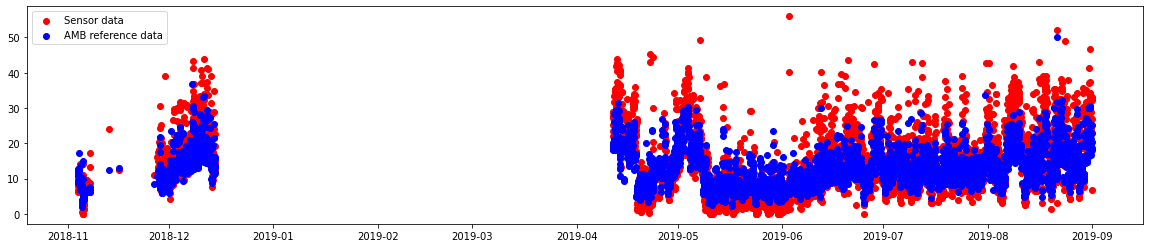

In [28]:

plt.figure(figsize=(20,4))
plt.scatter(final_df.index,final_df.valor, color='red', marker='o', label="Sensor data")
plt.scatter(final_df.index,final_df["PM2.5"], color='blue', marker='o', label="AMB reference data")
plt.legend()


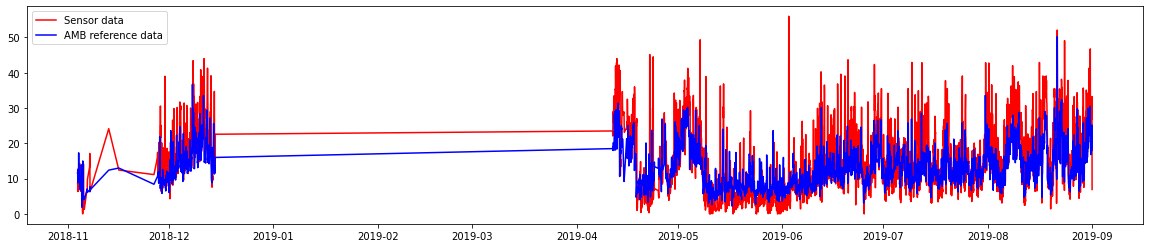

In [29]:
final_df = pd.merge(sensor_df, amb_data_df, how='inner', left_index=True, right_index=True)
final_df.dropna(axis=0, inplace=True)
final_df = final_df.sort_index()
plt.figure(figsize=(20,4))
plt.plot(final_df.index,final_df.valor, color='red', label="Sensor data")
plt.plot(final_df.index,final_df["PM2.5"], color='blue', label="AMB reference data")
plt.legend()

In [30]:
display(final_df)
distancia_euclidea = np.sqrt(np.sum((final_df["valor"] - final_df["PM2.5"])**2))
print("The euclidean distance was {}".format(distancia_euclidea))

valor  df_index  PM10  PM2.5  Temp_Aire  Lluvia  \
2018-11-03 23:00:00   8.680555    1331.5  22.6   11.5       22.0     0.0   
2018-11-04 00:00:00   8.472222    1322.5  24.1   12.2       21.5     0.0   
2018-11-04 01:00:00   6.909722    1310.5  24.0   12.6       21.4     0.0   
2018-11-04 02:00:00   6.347222    1298.5  24.5   12.1       20.8     0.0   
2018-11-04 03:00:00   7.833333    1286.5  15.9    8.8       20.9     0.0   
...                        ...       ...   ...    ...        ...     ...   
2019-08-31 19:00:00  26.833332       9.0  35.6   20.4       25.0     0.0   
2019-08-31 20:00:00  32.333336       8.0  30.0   18.7       24.8     0.0   
2019-08-31 21:00:00  32.416668       7.0  38.1   22.8       24.7     0.0   
2019-08-31 22:00:00  33.250000       6.0  46.6   25.2       24.3     0.0   
2019-08-31 23:00:00   6.916667       5.0  33.8   18.0       23.2     0.0   

                     Humedad_relativa         WD        WS  R_Solar  
2018-11-03 23:00:00              83.9  102.90000  1.500000      0.0  
2018-11-04 00:00:00              83.9  105.00000  1.300000      0.0  
2018-11-04 01:00:00              85.8  102.50000  1.500000      0.0  
2018-11-04 02:00:00              87.1   97.00000  0.900000      0.0  
2018-11-04 03:00:00              83.6  103.40000  0.700000      0.0  
...                               ...        ...       ...      ...  
2019-08-31 19:00:00              75.4  262.03127  1.438257      1.4  
2019-08-31 20:00:00              75.2  262.03127  1.438257      1.5  
2019-08-31 21:00:00              75.8  262.03127  1.438257      1.5  
2019-08-31 22:00:00              78.5  262.03127  1.438257      1.5  
2019-08-31 23:00:00              74.9  262.03127  1.438257      1.4  

[3797 rows x 10 columns]

The euclidean distance was 443.94031057753654


# Distancia euclidiana para tamaños de ventana

In [31]:
def get_results_for_roll(window=4):
    print("=================================================================================")
    print("Results with a rolling mean of {} elements in the window".format(window))
    rolling_df = final_df.rolling(window=window).mean()
    rolling_df.dropna(axis=0, inplace=True)
    display(rolling_df)
    distancia_euclidea = np.sqrt(np.sum((rolling_df["valor"] - rolling_df["PM2.5"])**2))
    plt.figure(figsize=(20,4))
    plt.title("Sensor data - AMB data")
    plt.plot(rolling_df.index,rolling_df.valor, color='red', label="Sensor data rolling {}".format(window))
    plt.plot(rolling_df.index,rolling_df["PM2.5"], color='blue', label="AMB reference rolling {}".format(window))
    plt.legend()
    plt.show()
    print("The euclidean distance was {}".format(distancia_euclidea))
    print("=================================================================================")
    return window, distancia_euclidea


Results with a rolling mean of 1 elements in the window


valor  df_index  PM10  PM2.5  Temp_Aire  \
2018-11-03 23:00:00   8.680555    1331.5  22.6   11.5       22.0   
2018-11-04 00:00:00   8.472222    1322.5  24.1   12.2       21.5   
2018-11-04 01:00:00   6.909722    1310.5  24.0   12.6       21.4   
2018-11-04 02:00:00   6.347222    1298.5  24.5   12.1       20.8   
2018-11-04 03:00:00   7.833333    1286.5  15.9    8.8       20.9   
...                        ...       ...   ...    ...        ...   
2019-08-31 19:00:00  26.833332       9.0  35.6   20.4       25.0   
2019-08-31 20:00:00  32.333336       8.0  30.0   18.7       24.8   
2019-08-31 21:00:00  32.416668       7.0  38.1   22.8       24.7   
2019-08-31 22:00:00  33.250000       6.0  46.6   25.2       24.3   
2019-08-31 23:00:00   6.916667       5.0  33.8   18.0       23.2   

                           Lluvia  Humedad_relativa         WD        WS  \
2018-11-03 23:00:00  0.000000e+00              83.9  102.90000  1.500000   
2018-11-04 00:00:00  0.000000e+00              83.9  105.00000  1.300000   
2018-11-04 01:00:00  0.000000e+00              85.8  102.50000  1.500000   
2018-11-04 02:00:00  0.000000e+00              87.1   97.00000  0.900000   
2018-11-04 03:00:00  0.000000e+00              83.6  103.40000  0.700000   
...                           ...               ...        ...       ...   
2019-08-31 19:00:00  6.938894e-16              75.4  262.03127  1.438257   
2019-08-31 20:00:00  6.938894e-16              75.2  262.03127  1.438257   
2019-08-31 21:00:00  6.938894e-16              75.8  262.03127  1.438257   
2019-08-31 22:00:00  6.938894e-16              78.5  262.03127  1.438257   
2019-08-31 23:00:00  6.938894e-16              74.9  262.03127  1.438257   

                     R_Solar  
2018-11-03 23:00:00      0.0  
2018-11-04 00:00:00      0.0  
2018-11-04 01:00:00      0.0  
2018-11-04 02:00:00      0.0  
2018-11-04 03:00:00      0.0  
...                      ...  
2019-08-31 19:00:00      1.4  
2019-08-31 20:00:00      1.5  
2019-08-31 21:00:00      1.5  
2019-08-31 22:00:00      1.5  
2019-08-31 23:00:00      1.4  

[3797 rows x 10 columns]

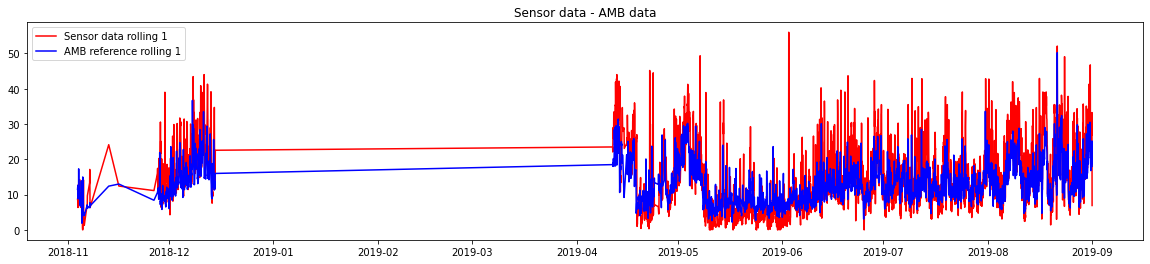

The euclidean distance was 443.9403105775379
Results with a rolling mean of 2 elements in the window


valor  df_index   PM10  PM2.5  Temp_Aire  Lluvia  \
2018-11-04 00:00:00   8.576389    1327.0  23.35  11.85      21.75     0.0   
2018-11-04 01:00:00   7.690972    1316.5  24.05  12.40      21.45     0.0   
2018-11-04 02:00:00   6.628472    1304.5  24.25  12.35      21.10     0.0   
2018-11-04 03:00:00   7.090278    1292.5  20.20  10.45      20.85     0.0   
2018-11-04 04:00:00   9.465278    1280.5  18.05   9.20      20.90     0.0   
...                        ...       ...    ...    ...        ...     ...   
2019-08-31 19:00:00  26.791667       9.5  36.85  20.75      25.30     0.0   
2019-08-31 20:00:00  29.583334       8.5  32.80  19.55      24.90     0.0   
2019-08-31 21:00:00  32.375002       7.5  34.05  20.75      24.75     0.0   
2019-08-31 22:00:00  32.833334       6.5  42.35  24.00      24.50     0.0   
2019-08-31 23:00:00  20.083333       5.5  40.20  21.60      23.75     0.0   

                     Humedad_relativa         WD        WS  R_Solar  
2018-11-04 00:00:00             83.90  103.95000  1.400000     0.00  
2018-11-04 01:00:00             84.85  103.75000  1.400000     0.00  
2018-11-04 02:00:00             86.45   99.75000  1.200000     0.00  
2018-11-04 03:00:00             85.35  100.20000  0.800000     0.00  
2018-11-04 04:00:00             83.00  106.70000  0.700000     0.00  
...                               ...        ...       ...      ...  
2019-08-31 19:00:00             73.70  262.03127  1.438257     1.45  
2019-08-31 20:00:00             75.30  262.03127  1.438257     1.45  
2019-08-31 21:00:00             75.50  262.03127  1.438257     1.50  
2019-08-31 22:00:00             77.15  262.03127  1.438257     1.50  
2019-08-31 23:00:00             76.70  262.03127  1.438257     1.45  

[3796 rows x 10 columns]

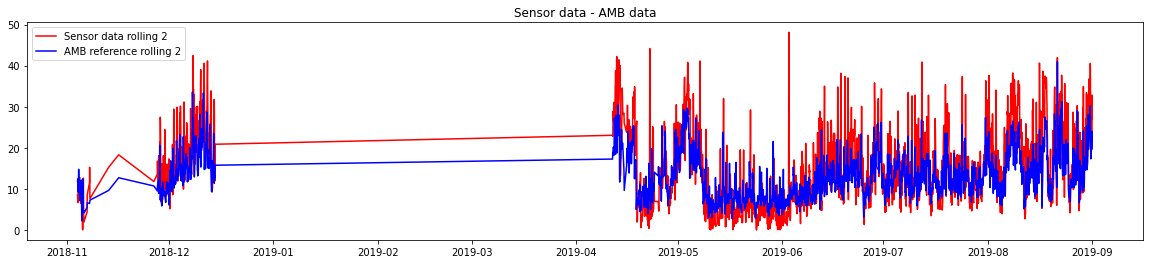

The euclidean distance was 400.7042472906178
Results with a rolling mean of 4 elements in the window


valor  df_index    PM10   PM2.5  Temp_Aire  \
2018-11-04 02:00:00   7.602431   1315.75  23.800  12.100     21.425   
2018-11-04 03:00:00   7.390625   1304.50  22.125  11.425     21.150   
2018-11-04 04:00:00   8.046875   1292.50  21.150  10.775     21.000   
2018-11-04 05:00:00   9.001736   1280.50  20.400  10.300     20.800   
2018-11-04 06:00:00  10.640625   1268.50  19.875   9.950     20.875   
...                        ...       ...     ...     ...        ...   
2019-08-31 19:00:00  28.625000     10.50  36.300  20.750     25.975   
2019-08-31 20:00:00  29.500000      9.50  35.225  20.700     25.475   
2019-08-31 21:00:00  29.583334      8.50  35.450  20.750     25.025   
2019-08-31 22:00:00  31.208334      7.50  37.575  21.775     24.700   
2019-08-31 23:00:00  26.229168      6.50  37.125  21.175     24.250   

                           Lluvia  Humedad_relativa         WD        WS  \
2018-11-04 02:00:00  0.000000e+00            85.175  101.85000  1.300000   
2018-11-04 03:00:00  0.000000e+00            85.100  101.97500  1.100000   
2018-11-04 04:00:00  0.000000e+00            84.725  103.22500  0.950000   
2018-11-04 05:00:00  0.000000e+00            84.625  102.57500  0.750000   
2018-11-04 06:00:00  0.000000e+00            83.325   94.27500  0.675000   
...                           ...               ...        ...       ...   
2019-08-31 19:00:00  5.065393e-16            69.275  262.03127  1.438257   
2019-08-31 20:00:00  5.065393e-16            72.225  262.03127  1.438257   
2019-08-31 21:00:00  5.065393e-16            74.600  262.03127  1.438257   
2019-08-31 22:00:00  5.065393e-16            76.225  262.03127  1.438257   
2019-08-31 23:00:00  5.065393e-16            76.100  262.03127  1.438257   

                     R_Solar  
2018-11-04 02:00:00    0.000  
2018-11-04 03:00:00    0.000  
2018-11-04 04:00:00    0.000  
2018-11-04 05:00:00    0.625  
2018-11-04 06:00:00   17.100  
...                      ...  
2019-08-31 19:00:00   47.500  
2019-08-31 20:00:00   15.550  
2019-08-31 21:00:00    1.475  
2019-08-31 22:00:00    1.475  
2019-08-31 23:00:00    1.475  

[3794 rows x 10 columns]

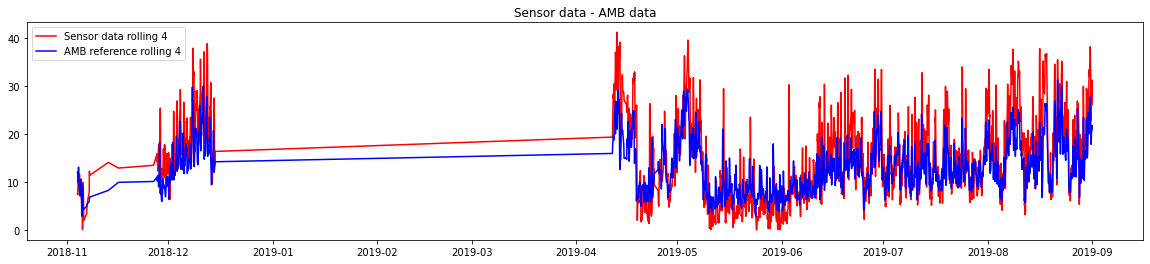

The euclidean distance was 349.5688930031776
Results with a rolling mean of 8 elements in the window


valor  df_index     PM10    PM2.5  Temp_Aire  \
2018-11-04 06:00:00   9.121528  1292.125  21.8375  11.0250    21.1500   
2018-11-04 07:00:00   9.477431  1280.500  23.1625  11.7500    21.1000   
2018-11-04 08:00:00   9.550347  1268.500  23.0125  11.7500    21.3750   
2018-11-04 09:00:00   9.802083  1256.500  23.0250  11.7125    21.8000   
2018-11-04 10:00:00  10.011285  1244.500  22.7625  11.4000    22.4750   
...                        ...       ...      ...      ...        ...   
2019-08-31 19:00:00  25.750000    12.500  35.9500  19.5375    26.5875   
2019-08-31 20:00:00  26.406250    11.500  34.4000  19.2875    26.3500   
2019-08-31 21:00:00  27.437500    10.500  34.8500  19.9125    26.1000   
2019-08-31 22:00:00  29.187500     9.500  36.5125  20.9625    25.6875   
2019-08-31 23:00:00  27.427084     8.500  36.7125  20.9625    25.1125   

                           Lluvia  Humedad_relativa         WD        WS  \
2018-11-04 06:00:00  0.000000e+00           84.2500   98.06250  0.987500   
2018-11-04 07:00:00  0.000000e+00           83.6500   98.71250  0.850000   
2018-11-04 08:00:00  0.000000e+00           81.4875   99.20000  0.737500   
2018-11-04 09:00:00  0.000000e+00           78.3750   94.36250  0.600000   
2018-11-04 10:00:00  0.000000e+00           74.3500  119.53750  0.525000   
...                           ...               ...        ...       ...   
2019-08-31 19:00:00  1.283695e-16           65.5125  262.03127  1.438257   
2019-08-31 20:00:00  1.283695e-16           66.8875  262.03127  1.438257   
2019-08-31 21:00:00  1.283695e-16           68.2750  262.03127  1.438257   
2019-08-31 22:00:00  1.283695e-16           70.5625  262.03127  1.438257   
2019-08-31 23:00:00  1.283695e-16           72.6875  262.03127  1.438257   

                      R_Solar  
2018-11-04 06:00:00    8.5500  
2018-11-04 07:00:00   29.7875  
2018-11-04 08:00:00   94.8875  
2018-11-04 09:00:00  172.7125  
2018-11-04 10:00:00  259.4250  
...                       ...  
2019-08-31 19:00:00  180.7625  
2019-08-31 20:00:00  162.3750  
2019-08-31 21:00:00  132.1375  
2019-08-31 22:00:00   66.7500  
2019-08-31 23:00:00   24.4875  

[3790 rows x 10 columns]

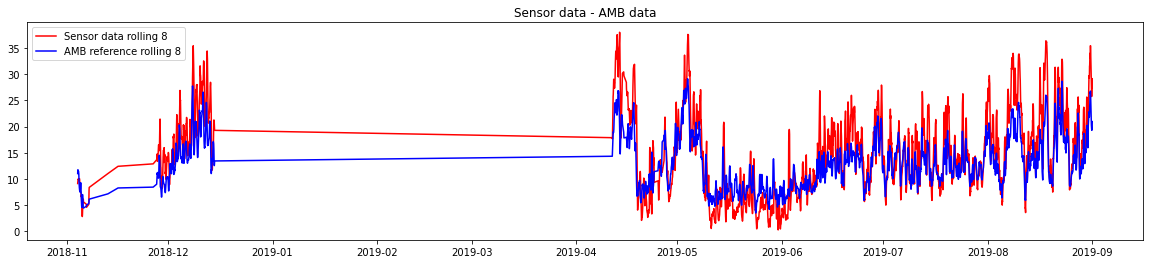

The euclidean distance was 286.6034016918691
Results with a rolling mean of 16 elements in the window


valor   df_index      PM10     PM2.5  Temp_Aire  \
2018-11-04 14:00:00   9.579427  1244.3125  22.23125  11.01250   23.20625   
2018-11-04 15:00:00   9.730469  1232.5000  21.71875  10.80000   23.43125   
2018-11-04 16:00:00   9.791233  1220.5000  21.08750  10.49375   23.65625   
2018-11-04 17:00:00   9.852431  1208.5000  20.59375  10.15625   23.80000   
2018-11-04 18:00:00   9.994792  1196.5000  20.03125   9.86250   23.92500   
...                        ...        ...       ...       ...        ...   
2019-08-31 19:00:00  30.604166    16.5000  42.35625  23.09375   25.85000   
2019-08-31 20:00:00  30.312500    15.5000  40.80000  22.38750   25.98125   
2019-08-31 21:00:00  30.421875    14.5000  40.58750  22.25625   26.13750   
2019-08-31 22:00:00  30.416666    13.5000  40.63750  22.26875   26.24375   
2019-08-31 23:00:00  28.515625    12.5000  39.05625  21.52500   26.21250   

                           Lluvia  Humedad_relativa         WD        WS  \
2018-11-04 14:00:00  0.000000e+00          73.01875  115.58125  0.668750   
2018-11-04 15:00:00  0.000000e+00          71.77500  125.69375  0.600000   
2018-11-04 16:00:00  0.000000e+00          70.62500  137.63125  0.568750   
2018-11-04 17:00:00  0.000000e+00          69.90000  151.53750  0.512500   
2018-11-04 18:00:00  0.000000e+00          69.52500  163.49375  0.531250   
...                           ...               ...        ...       ...   
2019-08-31 19:00:00  6.250000e-03          64.38125  262.03127  1.438257   
2019-08-31 20:00:00  2.237793e-16          64.18750  262.03127  1.438257   
2019-08-31 21:00:00  2.237793e-16          63.95000  262.03127  1.438257   
2019-08-31 22:00:00  2.237793e-16          64.33750  262.03127  1.438257   
2019-08-31 23:00:00  2.237793e-16          64.81250  262.03127  1.438257   

                       R_Solar  
2018-11-04 14:00:00  317.76250  
2018-11-04 15:00:00  339.46875  
2018-11-04 16:00:00  352.19375  
2018-11-04 17:00:00  352.51875  
2018-11-04 18:00:00  352.51875  
...                        ...  
2019-08-31 19:00:00  253.05625  
2019-08-31 20:00:00  253.05625  
2019-08-31 21:00:00  253.00625  
2019-08-31 22:00:00  248.54375  
2019-08-31 23:00:00  236.09375  

[3782 rows x 10 columns]

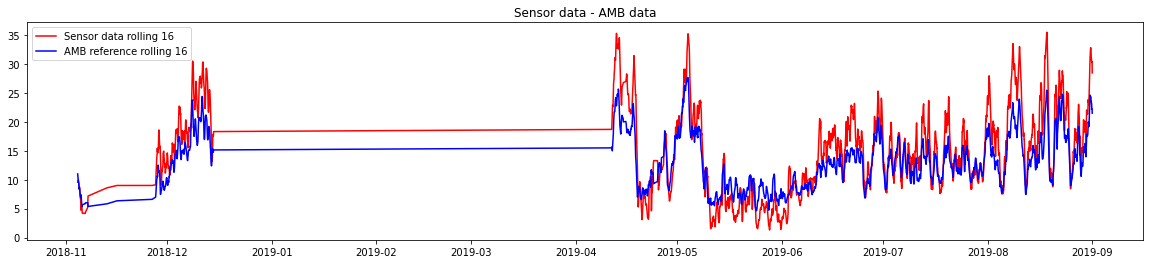

The euclidean distance was 245.10531657857268
Results with a rolling mean of 32 elements in the window


valor    df_index       PM10      PM2.5  Temp_Aire  \
2018-11-05 06:00:00   8.649740  1148.40625  18.734375   9.365625  22.650000   
2018-11-05 07:00:00   8.568793  1136.50000  18.275000   9.109375  22.562500   
2018-11-05 08:00:00   8.553819  1124.50000  17.828125   8.853125  22.493750   
2018-11-05 09:00:00   8.538194  1112.50000  17.390625   8.581250  22.478125   
2018-11-05 10:00:00   8.358941  1100.50000  17.075000   8.409375  22.543750   
...                        ...         ...        ...        ...        ...   
2019-08-31 19:00:00  28.614583    24.50000  39.662500  22.078125  25.937500   
2019-08-31 20:00:00  29.067708    23.50000  39.600000  22.184375  25.840625   
2019-08-31 21:00:00  29.507812    22.50000  39.878125  22.393750  25.725000   
2019-08-31 22:00:00  30.000000    21.50000  40.390625  22.678125  25.565625   
2019-08-31 23:00:00  29.609375    20.50000  40.534375  22.734375  25.375000   

                       Lluvia  Humedad_relativa          WD        WS  \
2018-11-05 06:00:00  0.506250         78.228125  199.346875  0.850000   
2018-11-05 07:00:00  0.559375         78.462500  206.259375  0.846875   
2018-11-05 08:00:00  0.590625         78.712500  212.890625  0.840625   
2018-11-05 09:00:00  0.593750         78.603125  219.303125  0.828125   
2018-11-05 10:00:00  0.596875         78.075000  226.181250  0.853125   
...                       ...               ...         ...       ...   
2019-08-31 19:00:00  0.003125         64.684375  262.031270  1.438257   
2019-08-31 20:00:00  0.003125         65.356250  262.031270  1.438257   
2019-08-31 21:00:00  0.003125         66.103125  262.031270  1.438257   
2019-08-31 22:00:00  0.003125         67.118750  262.031270  1.438257   
2019-08-31 23:00:00  0.003125         67.956250  262.031270  1.438257   

                        R_Solar  
2018-11-05 06:00:00  176.262500  
2018-11-05 07:00:00  176.643750  
2018-11-05 08:00:00  178.668750  
2018-11-05 09:00:00  188.996875  
2018-11-05 10:00:00  206.690625  
...                         ...  
2019-08-31 19:00:00  198.853125  
2019-08-31 20:00:00  190.768750  
2019-08-31 21:00:00  173.396875  
2019-08-31 22:00:00  153.006250  
2019-08-31 23:00:00  137.931250  

[3766 rows x 10 columns]

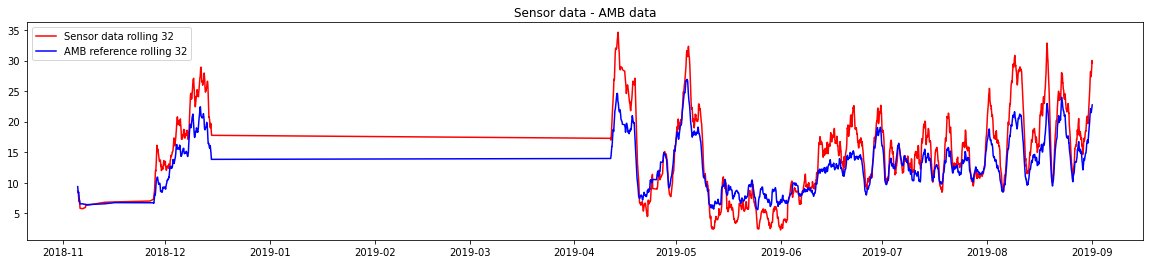

The euclidean distance was 223.5433345571881
Results with a rolling mean of 64 elements in the window


valor    df_index       PM10      PM2.5  Temp_Aire  \
2018-11-27 21:00:00   8.512041  856.593750  17.837500   8.351563  22.779687   
2018-11-27 22:00:00   8.559443  837.007812  17.792188   8.357813  22.778125   
2018-11-27 23:00:00   8.661439  817.546875  17.725000   8.353125  22.784375   
2018-11-28 00:00:00   8.825796  798.257812  17.579688   8.298438  22.790625   
2018-11-28 01:00:00   9.007871  779.140625  17.420313   8.245313  22.803125   
...                        ...         ...        ...        ...        ...   
2019-08-31 19:00:00  24.619791   40.500000  37.064062  19.407813  25.528125   
2019-08-31 20:00:00  24.980469   39.500000  37.245312  19.556250  25.593750   
2019-08-31 21:00:00  25.031250   38.500000  37.303125  19.685938  25.653125   
2019-08-31 22:00:00  25.079427   37.500000  37.379687  19.781250  25.703125   
2019-08-31 23:00:00  24.880208   36.500000  36.943750  19.662500  25.709375   

                       Lluvia  Humedad_relativa          WD        WS  \
2018-11-27 21:00:00  0.298438         77.337500  256.979688  1.285938   
2018-11-27 22:00:00  0.298438         77.396875  260.007813  1.284375   
2018-11-27 23:00:00  0.298438         77.420312  263.532813  1.284375   
2018-11-28 00:00:00  0.298438         77.364062  267.229688  1.279688   
2018-11-28 01:00:00  0.298438         77.298437  270.962500  1.282813   
...                       ...               ...         ...       ...   
2019-08-31 19:00:00  0.004687         64.560937  262.031270  1.438257   
2019-08-31 20:00:00  0.004687         64.459375  262.031270  1.438257   
2019-08-31 21:00:00  0.004687         64.362500  262.031270  1.438257   
2019-08-31 22:00:00  0.004687         64.290625  262.031270  1.438257   
2019-08-31 23:00:00  0.004687         64.335937  262.031270  1.438257   

                        R_Solar  
2018-11-27 21:00:00  171.664063  
2018-11-27 22:00:00  171.664063  
2018-11-27 23:00:00  171.664063  
2018-11-28 00:00:00  171.664063  
2018-11-28 01:00:00  171.664063  
...                         ...  
2019-08-31 19:00:00  230.560937  
2019-08-31 20:00:00  230.559375  
2019-08-31 21:00:00  230.551562  
2019-08-31 22:00:00  230.154687  
2019-08-31 23:00:00  225.973437  

[3734 rows x 10 columns]

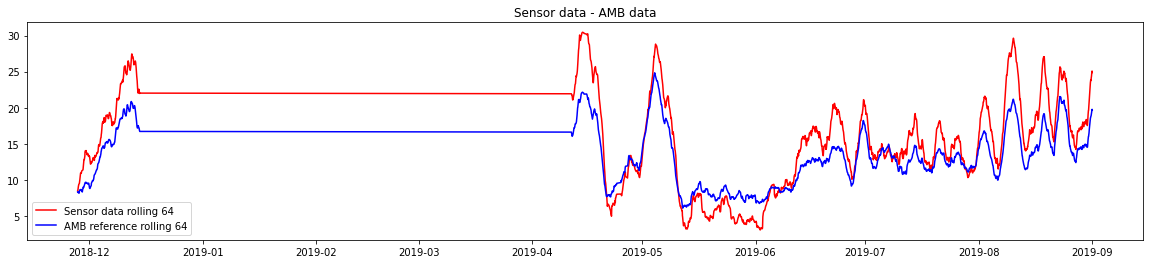

The euclidean distance was 208.37592864616923
Results with a rolling mean of 128 elements in the window


valor    df_index       PM10      PM2.5  Temp_Aire  \
2018-11-30 13:00:00  11.052895  451.546875  19.532031   8.940625  22.956250   
2018-11-30 14:00:00  11.112311  441.253906  19.529688   8.920313  22.993750   
2018-11-30 15:00:00  11.167773  431.023438  19.519531   8.898438  23.029688   
2018-11-30 16:00:00  11.226514  420.878906  19.493750   8.875781  23.058594   
2018-11-30 17:00:00  11.297462  410.820312  19.482031   8.866406  23.084375   
...                        ...         ...        ...        ...        ...   
2019-08-31 19:00:00  20.916667   72.500000  32.754687  16.846875  25.292969   
2019-08-31 20:00:00  21.063151   71.500000  32.789844  16.895312  25.262500   
2019-08-31 21:00:00  21.220703   70.500000  32.910156  16.986719  25.229688   
2019-08-31 22:00:00  21.380859   69.500000  32.783594  17.109375  25.193750   
2019-08-31 23:00:00  21.297526   68.500000  32.813281  17.138281  25.153125   

                      Lluvia  Humedad_relativa          WD        WS  \
2018-11-30 13:00:00  0.15000         77.221094  252.944531  1.057031   
2018-11-30 14:00:00  0.15000         77.036719  254.753125  1.057031   
2018-11-30 15:00:00  0.15000         76.898438  256.484375  1.064844   
2018-11-30 16:00:00  0.15000         76.784375  258.103125  1.066406   
2018-11-30 17:00:00  0.15000         76.714844  259.724219  1.082031   
...                      ...               ...         ...       ...   
2019-08-31 19:00:00  0.00625         66.239844  262.031270  1.438257   
2019-08-31 20:00:00  0.00625         66.432031  262.031270  1.438257   
2019-08-31 21:00:00  0.00625         66.629688  262.031270  1.438257   
2019-08-31 22:00:00  0.00625         66.851563  262.031270  1.438257   
2019-08-31 23:00:00  0.00625         67.026563  262.031270  1.438257   

                        R_Solar  
2018-11-30 13:00:00  162.897656  
2018-11-30 14:00:00  167.852344  
2018-11-30 15:00:00  171.101562  
2018-11-30 16:00:00  172.028125  
2018-11-30 17:00:00  172.125000  
...                         ...  
2019-08-31 19:00:00  222.063281  
2019-08-31 20:00:00  216.513281  
2019-08-31 21:00:00  211.475781  
2019-08-31 22:00:00  207.317969  
2019-08-31 23:00:00  204.937500  

[3670 rows x 10 columns]

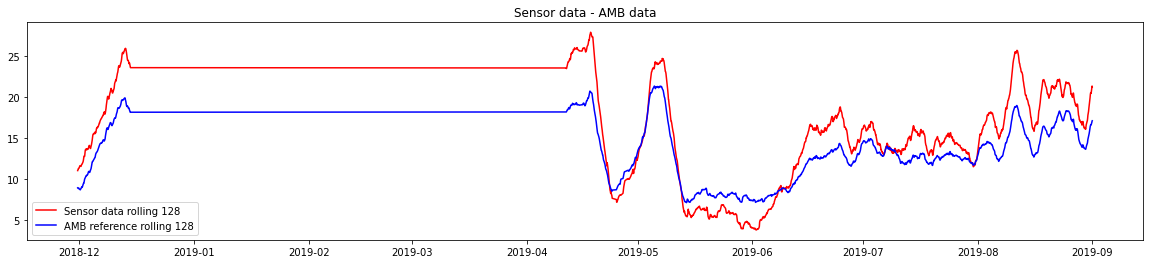

The euclidean distance was 194.11464204190764
Results with a rolling mean of 256 elements in the window


valor    df_index       PM10      PM2.5  Temp_Aire  \
2018-12-05 22:00:00  13.681023  345.363281  24.176172  11.202344  23.373047   
2018-12-05 23:00:00  13.724682  340.994141  24.226563  11.218359  23.373828   
2018-12-06 00:00:00  13.792034  336.656250  24.267578  11.238672  23.376563   
2018-12-06 01:00:00  13.822520  332.361328  24.325781  11.257422  23.378125   
2018-12-06 02:00:00  13.861901  328.109375  24.366797  11.277344  23.379297   
...                        ...         ...        ...        ...        ...   
2019-08-31 19:00:00  20.602214  136.500000  32.558594  17.032031  24.960937   
2019-08-31 20:00:00  20.677734  135.500000  32.575000  17.046875  24.976172   
2019-08-31 21:00:00  20.690430  134.500000  32.600391  17.065234  24.992578   
2019-08-31 22:00:00  20.695964  133.500000  32.616016  17.080859  25.004687   
2019-08-31 23:00:00  20.672200  132.500000  32.611328  17.083984  25.001562   

                       Lluvia  Humedad_relativa          WD        WS  \
2018-12-05 22:00:00  0.075000         72.668359  271.732813  1.348437   
2018-12-05 23:00:00  0.075000         72.638672  272.521094  1.348828   
2018-12-06 00:00:00  0.075000         72.601953  273.320313  1.350781   
2018-12-06 01:00:00  0.075000         72.567969  274.156641  1.349219   
2018-12-06 02:00:00  0.075000         72.544141  274.727344  1.350000   
...                       ...               ...         ...       ...   
2019-08-31 19:00:00  0.018750         66.263281  262.031270  1.438257   
2019-08-31 20:00:00  0.018359         66.245313  262.031270  1.438257   
2019-08-31 21:00:00  0.018359         66.215234  262.031270  1.438257   
2019-08-31 22:00:00  0.018359         66.207422  262.031270  1.438257   
2019-08-31 23:00:00  0.018359         66.254297  262.031270  1.438257   

                        R_Solar  
2018-12-05 22:00:00  199.055859  
2018-12-05 23:00:00  199.055859  
2018-12-06 00:00:00  199.055859  
2018-12-06 01:00:00  199.055859  
2018-12-06 02:00:00  199.055859  
...                         ...  
2019-08-31 19:00:00  213.173047  
2019-08-31 20:00:00  213.174609  
2019-08-31 21:00:00  213.173437  
2019-08-31 22:00:00  212.908594  
2019-08-31 23:00:00  211.599609  

[3542 rows x 10 columns]

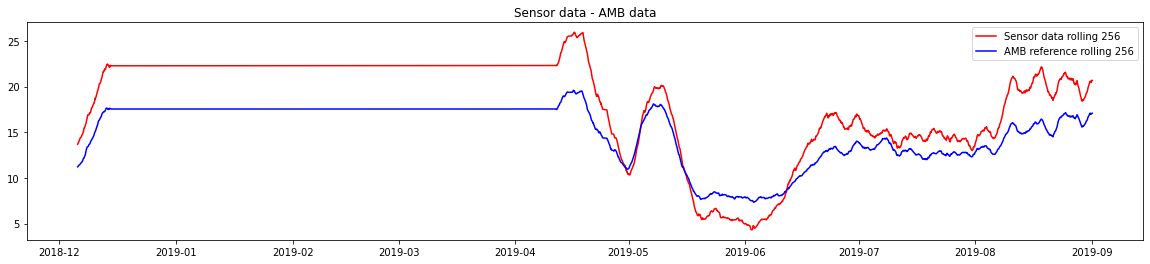

The euclidean distance was 178.67957491794274
Results with a rolling mean of 512 elements in the window


valor    df_index       PM10      PM2.5  Temp_Aire  \
2019-04-13 11:00:00  18.945701  247.998047  31.223047  14.993555  23.847266   
2019-04-13 12:00:00  18.993851  246.088867  31.252930  15.019141  23.859375   
2019-04-13 13:00:00  19.056731  244.195312  31.281055  15.048437  23.871875   
2019-04-13 14:00:00  19.125592  242.323242  31.307031  15.074414  23.885547   
2019-04-13 15:00:00  19.184973  240.472656  31.333789  15.102930  23.898633   
...                        ...         ...        ...        ...        ...   
2019-08-31 19:00:00  19.710286  264.911133  30.966211  15.831055  24.197656   
2019-08-31 20:00:00  19.726074  263.909180  30.959766  15.831250  24.190430   
2019-08-31 21:00:00  19.734863  262.907227  30.960742  15.839258  24.183008   
2019-08-31 22:00:00  19.753906  261.905273  30.995312  15.858398  24.174023   
2019-08-31 23:00:00  19.720378  260.903320  31.005078  15.861133  24.166992   

                       Lluvia  Humedad_relativa          WD        WS  \
2019-04-13 11:00:00  0.039063         70.166406  276.229688  1.346484   
2019-04-13 12:00:00  0.039063         70.112305  276.581055  1.345703   
2019-04-13 13:00:00  0.039063         70.065625  276.883203  1.345898   
2019-04-13 14:00:00  0.039063         70.009375  277.249023  1.345898   
2019-04-13 15:00:00  0.039453         69.958203  277.664844  1.348242   
...                       ...               ...         ...       ...   
2019-08-31 19:00:00  0.017383         68.834766  263.546361  1.340711   
2019-08-31 20:00:00  0.017188         68.875000  263.428258  1.340981   
2019-08-31 21:00:00  0.017188         68.917188  263.319725  1.341251   
2019-08-31 22:00:00  0.017188         68.969922  263.227013  1.341521   
2019-08-31 23:00:00  0.017188         68.990625  263.130394  1.341401   

                        R_Solar  
2019-04-13 11:00:00  212.314062  
2019-04-13 12:00:00  213.581836  
2019-04-13 13:00:00  214.941211  
2019-04-13 14:00:00  216.103516  
2019-04-13 15:00:00  216.457617  
...                         ...  
2019-08-31 19:00:00  186.803516  
2019-08-31 20:00:00  185.789258  
2019-08-31 21:00:00  185.016406  
2019-08-31 22:00:00  184.039258  
2019-08-31 23:00:00  183.674805  

[3286 rows x 10 columns]

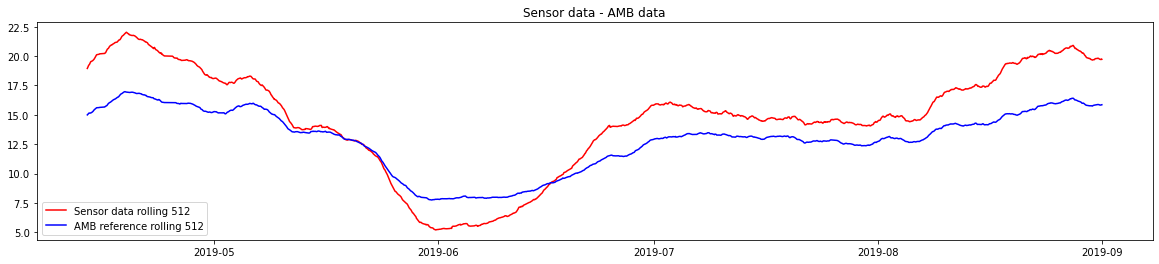

The euclidean distance was 150.09282385927133


In [32]:
windows = []
euclidean_distances = []
for i in range(10):
    w, e = get_results_for_roll(2**i)
    windows.append(w)
    euclidean_distances.append(e)
    

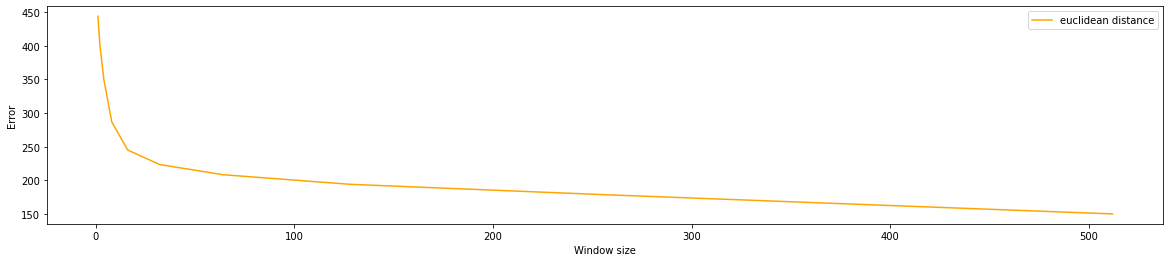

In [33]:
plt.figure(figsize=(20,4))
plt.plot(windows,euclidean_distances, color='orange', label="euclidean distance")
plt.ylabel("Error")
plt.xlabel("Window size")
plt.legend()
plt.show()

# Estrategia de calibración

In [61]:
stats_df = final_df[["valor", "PM2.5"]]
stats_df.profile_report()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


In [59]:
def get_results_for_roll_correct(window=4):
    from sklearn import linear_model
    print("=================================================================================")
    print("Results with a rolling mean of {} elements in the window".format(window))
    rolling_df = final_df.rolling(window=window).mean()
    rolling_df.dropna(axis=0, inplace=True)
    reg = linear_model.LinearRegression()
    reg.fit(y=rolling_df[['PM2.5']], X=rolling_df[['valor']].values.reshape(-1,1))
    m = reg.coef_[0,0]
    b = reg.intercept_[0]
    print("The coefficient m={:.2f}, and intercept b={:.2f}".format(m,b))
    rolling_df["PM2.5_pred"] = m*rolling_df.valor.values + b
    plt.figure(figsize=(20,4))
    plt.title("Sensor data - AMB data")
    plt.plot(rolling_df.index,rolling_df["PM2.5_pred"], color='red', label="Sensor corrected rolling {}".format(window))
    plt.plot(rolling_df.index,rolling_df["PM2.5"], color='green', label="AMB reference rolling {}".format(window))
    plt.legend()
    plt.show()
    distancia_euclidea = np.sqrt(np.sum((rolling_df["PM2.5"] - rolling_df["PM2.5_pred"])**2))
    print("The euclidean distance was {}".format(distancia_euclidea))
    print("=================================================================================")
    return window, distancia_euclidea


Results with a rolling mean of 1 elements in the window
The coefficient m=0.41, and intercept b=6.98


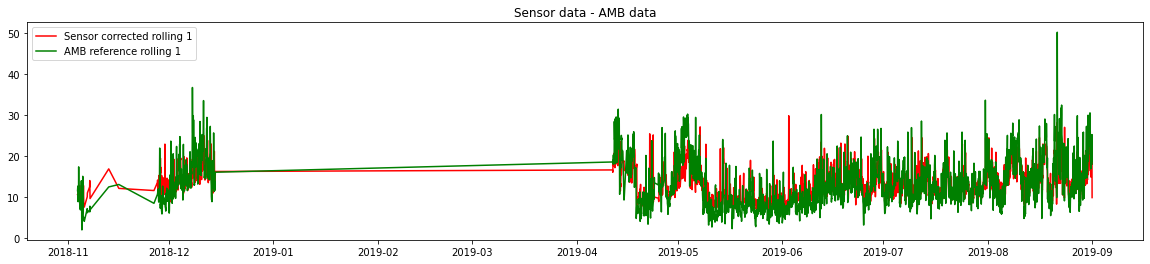

The euclidean distance was 255.63431123194337
Results with a rolling mean of 2 elements in the window
The coefficient m=0.45, and intercept b=6.40


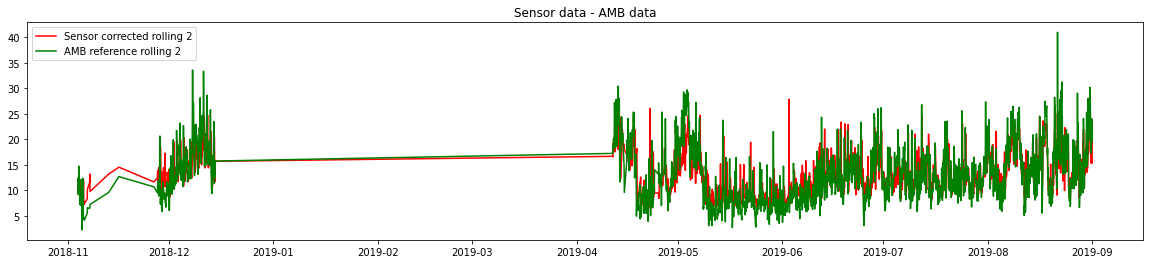

The euclidean distance was 231.77880248394047
Results with a rolling mean of 4 elements in the window
The coefficient m=0.49, and intercept b=5.69


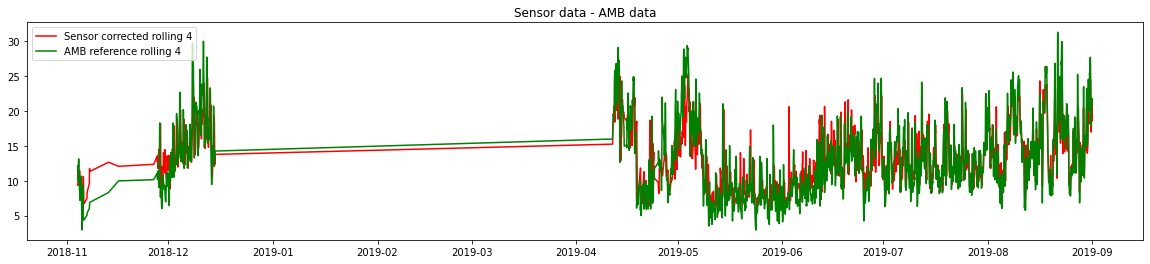

The euclidean distance was 196.45755185901263
Results with a rolling mean of 8 elements in the window
The coefficient m=0.55, and intercept b=4.80


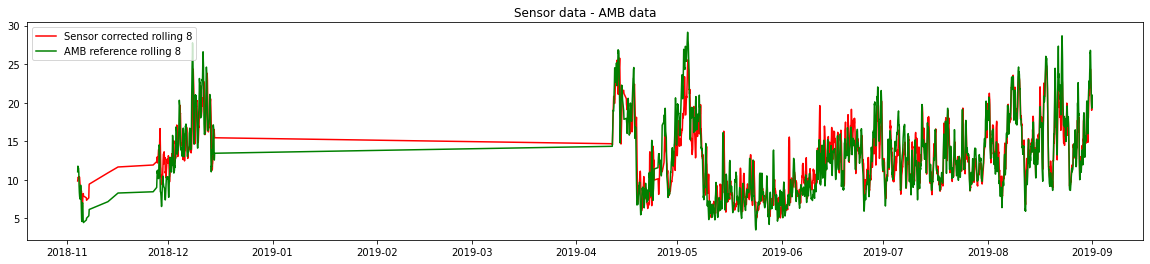

The euclidean distance was 143.14499740561502
Results with a rolling mean of 16 elements in the window
The coefficient m=0.59, and intercept b=4.28


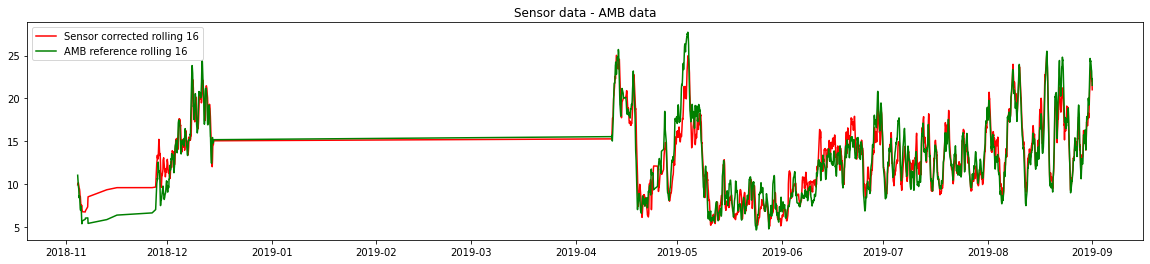

The euclidean distance was 101.59767648956743
Results with a rolling mean of 32 elements in the window
The coefficient m=0.60, and intercept b=4.09


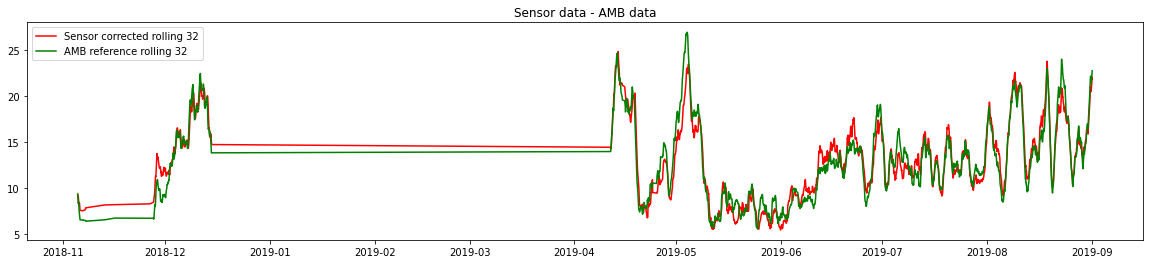

The euclidean distance was 80.31680082269474
Results with a rolling mean of 64 elements in the window
The coefficient m=0.60, and intercept b=4.09


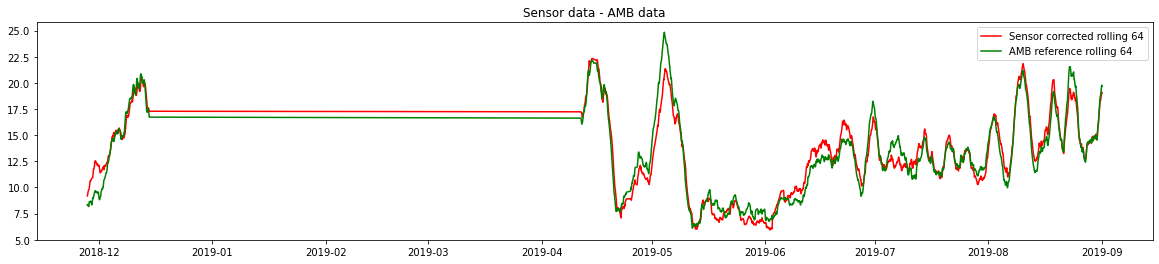

The euclidean distance was 67.58983628870146
Results with a rolling mean of 128 elements in the window
The coefficient m=0.59, and intercept b=4.22


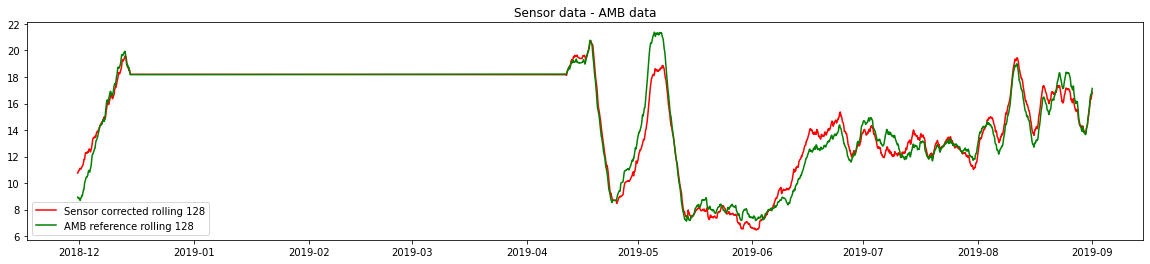

The euclidean distance was 56.70218027072521
Results with a rolling mean of 256 elements in the window
The coefficient m=0.58, and intercept b=4.47


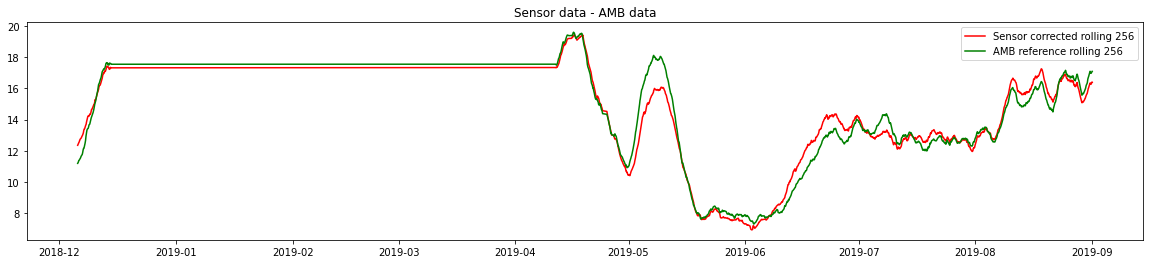

The euclidean distance was 43.92386757485238
Results with a rolling mean of 512 elements in the window
The coefficient m=0.57, and intercept b=4.60


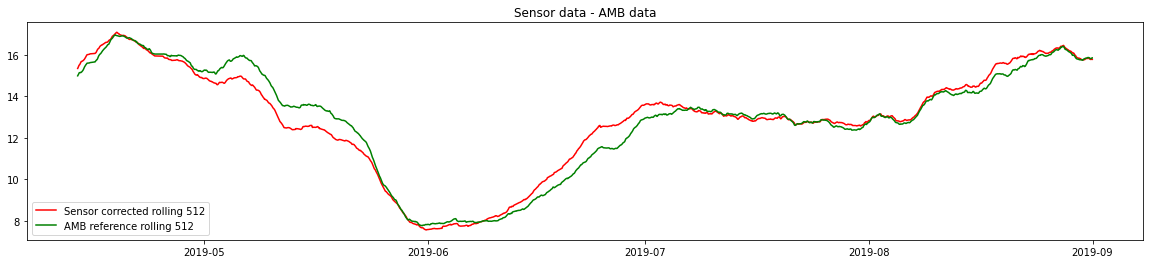

The euclidean distance was 30.139915493419338


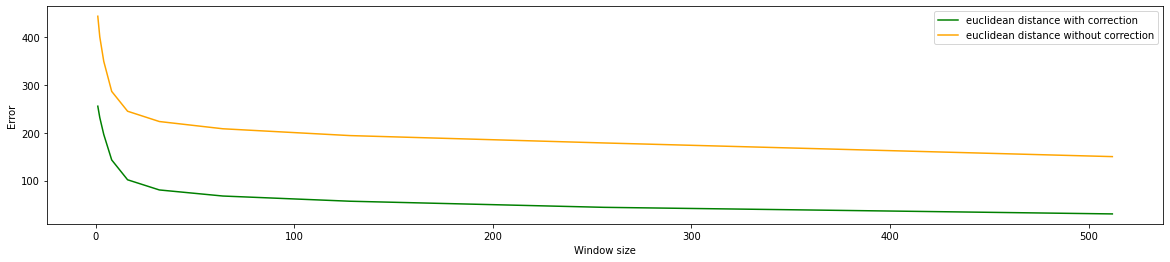

In [60]:
windows_c = []
euclidean_distances_c = []
for i in range(10):
    w, e = get_results_for_roll_correct(2**i)
    windows_c.append(w)
    euclidean_distances_c.append(e)
plt.figure(figsize=(20,4))
plt.plot(windows_c,euclidean_distances_c, color='green', label="euclidean distance with correction")
plt.plot(windows,euclidean_distances, color='orange', label="euclidean distance without correction")

plt.ylabel("Error")
plt.xlabel("Window size")
plt.legend()
plt.show()

In [39]:
final_df

valor  df_index  PM10  PM2.5  Temp_Aire  Lluvia  \
2018-11-03 23:00:00   8.680555    1331.5  22.6   11.5       22.0     0.0   
2018-11-04 00:00:00   8.472222    1322.5  24.1   12.2       21.5     0.0   
2018-11-04 01:00:00   6.909722    1310.5  24.0   12.6       21.4     0.0   
2018-11-04 02:00:00   6.347222    1298.5  24.5   12.1       20.8     0.0   
2018-11-04 03:00:00   7.833333    1286.5  15.9    8.8       20.9     0.0   
...                        ...       ...   ...    ...        ...     ...   
2019-08-31 19:00:00  26.833332       9.0  35.6   20.4       25.0     0.0   
2019-08-31 20:00:00  32.333336       8.0  30.0   18.7       24.8     0.0   
2019-08-31 21:00:00  32.416668       7.0  38.1   22.8       24.7     0.0   
2019-08-31 22:00:00  33.250000       6.0  46.6   25.2       24.3     0.0   
2019-08-31 23:00:00   6.916667       5.0  33.8   18.0       23.2     0.0   

                     Humedad_relativa         WD        WS  R_Solar  
2018-11-03 23:00:00              83.9  102.90000  1.500000      0.0  
2018-11-04 00:00:00              83.9  105.00000  1.300000      0.0  
2018-11-04 01:00:00              85.8  102.50000  1.500000      0.0  
2018-11-04 02:00:00              87.1   97.00000  0.900000      0.0  
2018-11-04 03:00:00              83.6  103.40000  0.700000      0.0  
...                               ...        ...       ...      ...  
2019-08-31 19:00:00              75.4  262.03127  1.438257      1.4  
2019-08-31 20:00:00              75.2  262.03127  1.438257      1.5  
2019-08-31 21:00:00              75.8  262.03127  1.438257      1.5  
2019-08-31 22:00:00              78.5  262.03127  1.438257      1.5  
2019-08-31 23:00:00              74.9  262.03127  1.438257      1.4  

[3797 rows x 10 columns]

In [62]:
amb_data_df

PM10  PM2.5  Temp_Aire  Lluvia  Humedad_relativa  \
Date&Time                                                               
2018-10-01 00:00:00  13.0    6.4       22.9     0.0              80.2   
2018-10-01 01:00:00  13.8    6.4       21.9     0.1              88.0   
2018-10-01 02:00:00  13.2    6.7       22.1     0.0              87.0   
2018-10-01 03:00:00  12.4    6.0       22.1     0.0              83.1   
2018-10-01 04:00:00  16.1    7.3       21.2     0.0              90.8   
...                   ...    ...        ...     ...               ...   
2019-08-31 19:00:00  35.6   20.4       25.0     0.0              75.4   
2019-08-31 20:00:00  30.0   18.7       24.8     0.0              75.2   
2019-08-31 21:00:00  38.1   22.8       24.7     0.0              75.8   
2019-08-31 22:00:00  46.6   25.2       24.3     0.0              78.5   
2019-08-31 23:00:00  33.8   18.0       23.2     0.0              74.9   

                            WD        WS  R_Solar  
Date&Time                                          
2018-10-01 00:00:00  126.20000  1.000000      0.0  
2018-10-01 01:00:00  124.60000  1.100000      0.0  
2018-10-01 02:00:00  134.80000  1.100000      0.0  
2018-10-01 03:00:00  140.60000  0.800000      0.0  
2018-10-01 04:00:00  177.50000  1.000000      0.0  
...                        ...       ...      ...  
2019-08-31 19:00:00  262.03127  1.438257      1.4  
2019-08-31 20:00:00  262.03127  1.438257      1.5  
2019-08-31 21:00:00  262.03127  1.438257      1.5  
2019-08-31 22:00:00  262.03127  1.438257      1.5  
2019-08-31 23:00:00  262.03127  1.438257      1.4  

[8040 rows x 8 columns]

In [63]:
sensor_df

valor  df_index
fecha_hora_med                          
2018-11-03 23:00:00   8.680555    1331.5
2018-11-04 00:00:00   8.472222    1322.5
2018-11-04 01:00:00   6.909722    1310.5
2018-11-04 02:00:00   6.347222    1298.5
2018-11-04 03:00:00   7.833333    1286.5
...                        ...       ...
2019-09-01 00:00:00   6.166667       4.0
2019-09-01 01:00:00   7.833333       3.0
2019-09-01 02:00:00   5.416667       2.0
2019-09-01 03:00:00   5.750000       1.0
2019-09-01 04:00:00  19.166668       0.0

[7230 rows x 2 columns]